# AI-Powered Customer Engagement Predictor for Messaging Platforms

### Objective:
Build a machine learning model that predicts customer engagement or response likelihood on messaging platforms (WhatsApp, SMS, email) based on historical campaign data. This simulates real-world applications relevant to Serri’s AI communications platform.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
print(data.head())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [ ]:
data.shape

(9134, 24)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
target = 'Response'
features = [col for col in data.columns if col != target and col != 'Customer']

In [ ]:
le_target = LabelEncoder()
data[target] = le_target.fit_transform(data[target])

In [ ]:
categorical_cols = data[features].select_dtypes(include=['object']).columns.tolist()
numerical_cols = data[features].select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Numerical Columns: ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
X = data[features]
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Customer Lifetime Value',
                                                   'Income',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies',
                                                   'Total Claim Amount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'Coverage',
                                                   'Education',
                                                   'Effective To Date',
                                                   'EmploymentStatus', 'Gender',
                                                   'Location Code',
                                                   'Marital Status',
                                                   'Policy Type', 'Policy',
                                                   'Renew Offer Type',
                                                   'Sales Channel',
                                                   'Vehicle Class',
                                                   'Vehicle Size'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9972632731253421

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       1.00      0.98      0.99       262

    accuracy                           1.00      1827
   macro avg       1.00      0.99      0.99      1827
weighted avg       1.00      1.00      1.00      1827

ROC-AUC Score: 0.9996963636807062


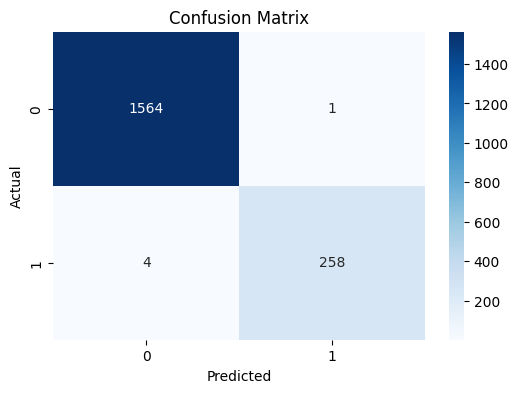

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
onehot_cols = clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(onehot_cols)
all_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'State_Arizona',
 'State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'Coverage_Basic',
 'Coverage_Extended',
 'Coverage_Premium',
 'Education_Bachelor',
 'Education_College',
 'Education_Doctor',
 'Education_High School or Below',
 'Education_Master',
 'Effective To Date_1/1/11',
 'Effective To Date_1/10/11',
 'Effective To Date_1/11/11',
 'Effective To Date_1/12/11',
 'Effective To Date_1/13/11',
 'Effective To Date_1/14/11',
 'Effective To Date_1/15/11',
 'Effective To Date_1/16/11',
 'Effective To Date_1/17/11',
 'Effective To Date_1/18/11',
 'Effective To Date_1/19/11',
 'Effective To Date_1/2/11',
 'Effective To Date_1/20/11',
 'Effective To Date_1/21/11',
 'Effective To Date_1/22/11',
 'Effective To Date_1/23/11',
 'Effective To Date_1/24/11',
 'Effective 

In [ ]:
importances = clf.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [ ]:
importances

array([0.06577432, 0.06332776, 0.05511255, 0.05087136, 0.05954756,
       0.01510248, 0.03134554, 0.06317142, 0.00456068, 0.00473003,
       0.00261757, 0.00459118, 0.0030137 , 0.01024699, 0.00928857,
       0.00508073, 0.01069026, 0.01086861, 0.00583807, 0.00978927,
       0.00808389, 0.0024838 , 0.00413973, 0.00429208, 0.00197598,
       0.00264137, 0.00348401, 0.00267819, 0.0018812 , 0.00208901,
       0.00171689, 0.00513371, 0.0030559 , 0.00322021, 0.00427463,
       0.00048875, 0.0011493 , 0.00163191, 0.00200355, 0.00808494,
       0.0047006 , 0.00493475, 0.00179907, 0.00384789, 0.00334691,
       0.00839333, 0.00032911, 0.00327683, 0.0020031 , 0.00301394,
       0.00158041, 0.00110294, 0.00349293, 0.00226362, 0.00052034,
       0.00178097, 0.00176442, 0.00432675, 0.00089112, 0.00157638,
       0.00327483, 0.00191878, 0.00604591, 0.00139826, 0.00255429,
       0.00232953, 0.00173907, 0.00184613, 0.00216039, 0.00118105,
       0.00331658, 0.0035242 , 0.00359233, 0.00341678, 0.00089

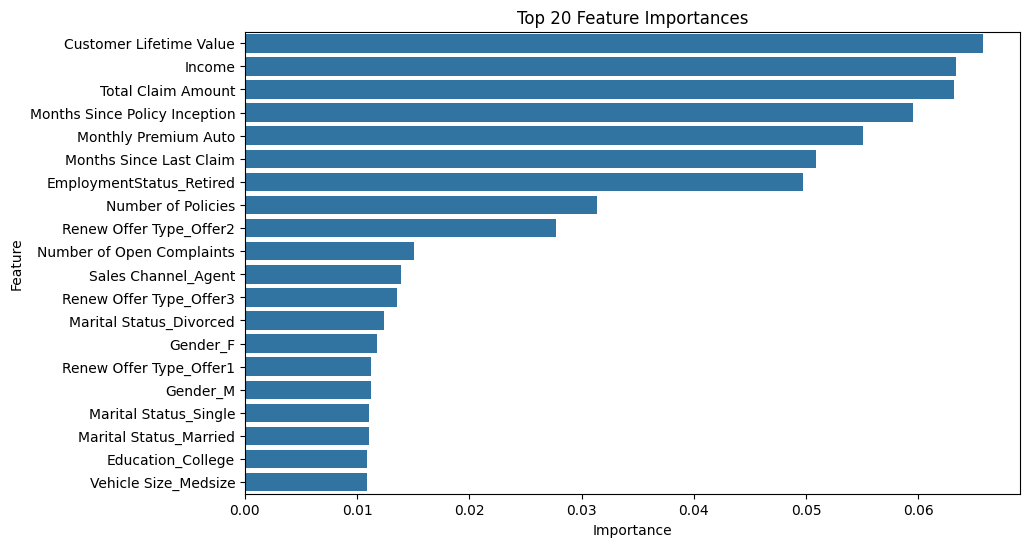

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()